In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [11]:
ts = np.arange(6)+1
dat1 = np.array(
  [[309 ,0.54, 0.67 ,      0.75,    0.79,     0.85,  0.87],
   [328 ,0.90, 0.94  ,     1.03,    1.08,     1.12,  1.15],
   [349 ,1.22,  1.26,    1.31,  1.33,  1.36,  1.34],
   [369,1.31,  1.46,    1.51,  1.58,  1.67,    np.nan],
   [389,1.71,  1.75,    1.80,  1.85,  1.82,  1.91],
   [409,1.87,  1.97,    2.02,  2.05,  2.12,  2.02],
   [429,2.36,  2.36,    2.36,  2.29,  2.33,    np.nan],
   [450,2.36,  2.29,    2.43,  2.37,  2.43,    np.nan],
   [468,2.46,  2.54,    2.50,  2.56,  2.64,  2.72],
   [489, 2.47,  2.55,    2.58,  2.64,  2.81,    np.nan],
   [507,2.52,  2.54 ,   2.65,  2.92,  3.08,  3.16]])
Ts = dat1[:,0] + 273
Us = dat1[:,1:]

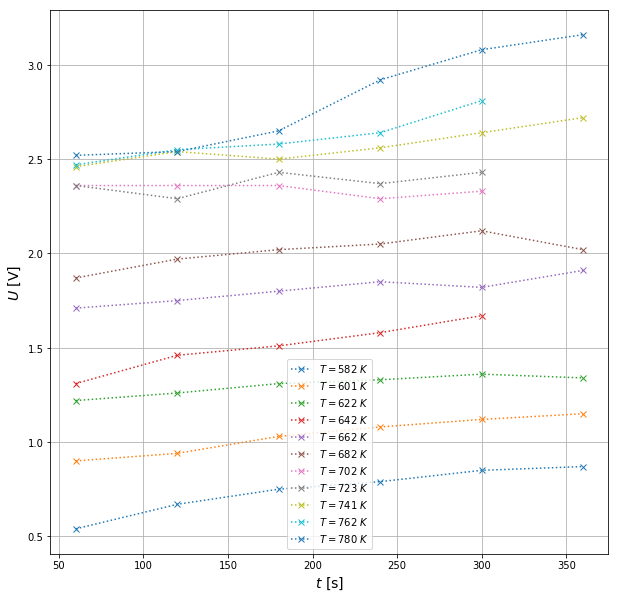

In [46]:
plt.figure(figsize=(10,10))
plt.plot(ts*60, Us.T, "x:")
plt.legend(list(map(lambda T: f"$T = {T:.0f} \\ K$", Ts)))
plt.xlabel("$ t \ \mathrm{[s]}$", fontsize=14)
plt.ylabel("$ U \ \mathrm{[V]}$", fontsize=14)
plt.grid()
plt.savefig("U_t1.pdf")

In [14]:
Usel = Us[:,-2]

In [19]:
t2s = np.array([[0,15], 
       [0,30],
       [0,45],
       [1,0], 
       [1,15],
       [1,30],
       [1,45], 
       [2,0] , 
       [2,15],
       [2,30], 
       [2,45],
       [3,0],
       [3,15],
       [3,30],
       [3,45],
       [4,0],
       [4,15],
       [4,30],
       [4,45],
       [5,0]])
t2s = t2s[:,0]*60 + t2s[:,1]

In [21]:
U2s = np.array([[   369, 1.22, 1.26,1.29, 1.31 ,1.38, 1.49, 1.48, 1.46 ,1.44,1.43  ,1.46,   1.51,1.59, 1.63, 1.63, 1.58,1.55, 1.54 ,1.59,   1.67],
   [429, 2.04, 2.22 ,2.35, 2.36 , 2.26, 2.40, 2.32, 2.36,2.36  ,2.34,2.33,   2.36   ,2.34, 2.27, 2.23, 2.29 , 2.26  ,2.25 ,2.23,   2.33],
               [489, 2.10, 2.35  ,2.46, 2.47 , 2.49, 2.52, 2.55, 2.55,2.58  ,2.61,2.57,   2.58  ,  2.60, 2.61, 2.60, 2.64 ,2.66, 2.76 ,2.77,  2.81]])

T2s = U2s[:,0] + 273
U2s = U2s[:,1:]

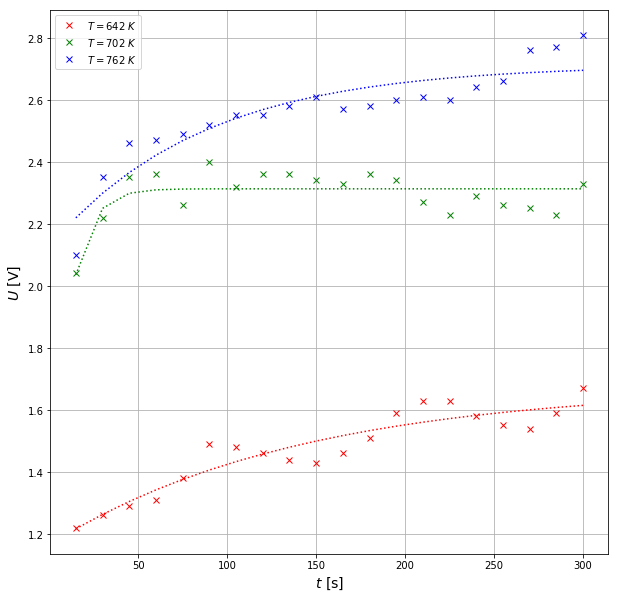

In [48]:
plt.figure(figsize=(10,10))
cols = ["r", "g", "b"]
def expl(tup):
    col, dat, T = tup
    lab = f"$T = {T:.0f} \\ K$"
    plt.plot(t2s, dat,"x", c=col, label=lab)
  
    y = lambda x, a, b, c: a - b*np.exp(-x/c)
    pars, cors = curve_fit(y, t2s, dat, [dat.max(), dat.max()-dat.min(), 100.0])
    plt.plot(t2s, y(t2s, *pars), ":", c=col)
    return pars[0] - y(300, *pars)
dUs = list(map(expl, zip(cols, U2s, T2s)))
plt.xlabel("$t \ \mathrm{[s]}$", fontsize=14)
plt.ylabel("$U \ \mathrm{[V]}$", fontsize=14)
plt.legend()
plt.grid()
plt.savefig("U_t2.pdf")

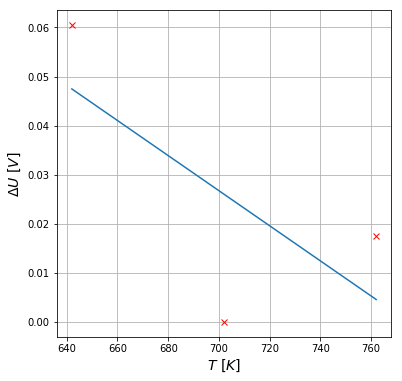

In [49]:
from scipy.stats import linregress
plt.figure(figsize=(6,6))
plt.plot(T2s, dUs, "rx")
dupars = linregress( T2s, dUs)
dUf = lambda T : dupars.intercept + dupars.slope*T
plt.plot(T2s, dUf(T2s))
plt.xlabel("$T \ [K]$", fontsize=14)
plt.ylabel("$\Delta U \ [V]$", fontsize=14)
plt.grid()
plt.savefig("korr.pdf")

(LinregressResult(slope=8.266903918175028e-12, intercept=0.1435358008420009, rvalue=0.9814872018056511, pvalue=9.109341137326682e-08, stderr=5.377354445465409e-13),
 LinregressResult(slope=7.992053100833044e-12, intercept=0.2392070161611417, rvalue=0.9809634066411108, pvalue=1.0320154516938687e-07, stderr=5.273720901727078e-13))

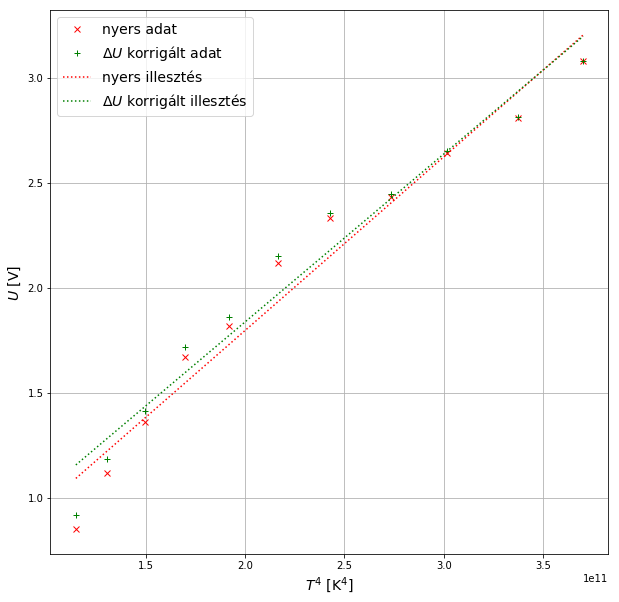

In [50]:
from scipy.stats import linregress
plt.figure(figsize=(10,10))
plt.plot((Ts)**4, Usel, "rx", label="nyers adat")
plt.plot((Ts)**4, Usel + dUf(Ts), "g+", label="$\Delta U$ korrigált adat")
plt.xlabel("$ T^4 \ \mathrm{[K^4]}$", fontsize=14)
plt.ylabel("$ U \ \mathrm{[V]}$", fontsize=14)
pars = linregress((Ts)**4, Usel)
plt.plot((Ts)**4, pars.intercept + pars.slope*(Ts)**4, "r:",label="nyers illesztés")
pars1 = linregress((Ts)**4, Usel+ dUf(Ts))
plt.plot((Ts)**4, pars1.intercept + pars1.slope*(Ts)**4, "g:",label="$\Delta U$ korrigált illesztés")
plt.legend(fontsize=14)
plt.grid()
plt.savefig("linfit.pdf")
pars, pars1

[-3.95505215e+03  3.90939468e+03  1.85912166e-03]
[8.98331715e+05 8.98266143e+05 4.22051935e-01]

[-4.23136461e+03  4.18728282e+03  1.68056953e-03]
[8.86840331e+05 8.86787667e+05 3.52065996e-01]


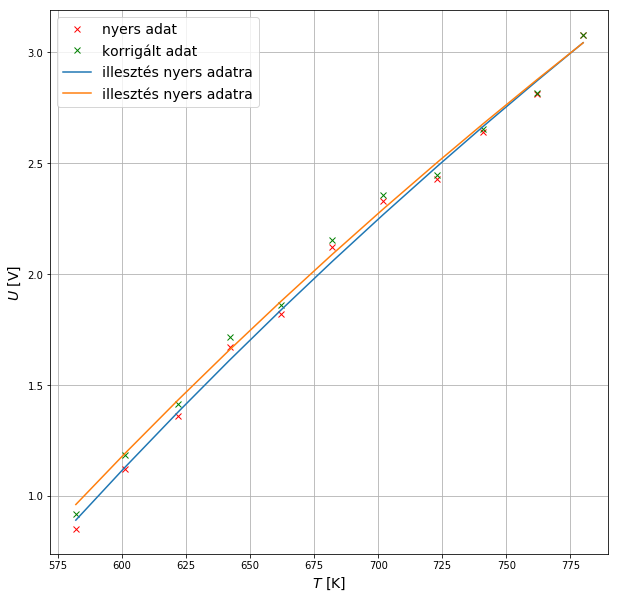

In [51]:
from scipy.optimize import curve_fit
plt.figure(figsize=(10,10))
plt.plot(Ts, Usel, "rx", label="nyers adat")
plt.plot(Ts, Usel + dUf(Ts), "gx", label="korrigált adat")
plt.xlabel("$ T \ \mathrm{[K]}$", fontsize=14)
plt.ylabel("$ U \ \mathrm{[V]}$", fontsize=14)
mono = lambda T, a, b, c: a + b*T**c
pars = [0, 0.0105, 4.0]
pars, errs = curve_fit(mono, Ts, Usel, p0=pars, maxfev=100000)
plt.plot(Ts, mono(Ts, *pars), label="illesztés nyers adatra")
pars1, errs1 = curve_fit(mono, Ts, Usel + dUf(Ts), p0=pars, maxfev=100000)
#pars1[2] = 0.0
plt.plot(Ts, mono(Ts, *pars1), label="illesztés nyers adatra")
plt.legend(fontsize=14)
plt.grid()
plt.savefig("curfit.pdf")
print(pars)
print(np.sqrt(np.diag(errs)))
print()
print(pars1)
print(np.sqrt(np.diag(errs1)))